In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_excel('Concrete_Data.xlsx')

In [3]:
data.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
CCS,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


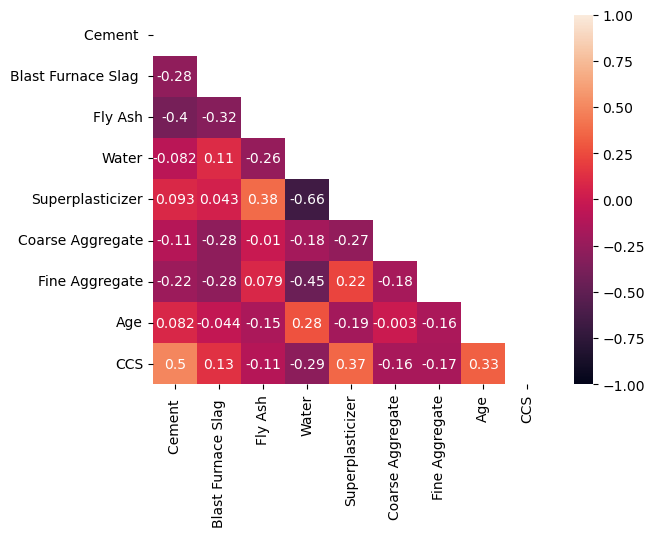

In [5]:
# Correlation plot

sns.heatmap(data.corr(), annot = True, vmin=-1, vmax = 1, mask = np.triu(data.corr()))
plt.show()

## Treat the defects

In [6]:
data.isnull().sum()

Cement                 0
Blast Furnace Slag     0
Fly Ash                0
Water                  0
Superplasticizer       0
Coarse Aggregate       0
Fine Aggregate         0
Age                    0
CCS                    0
dtype: int64

In [7]:
# Duplicates

data[data.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.shape

(1005, 9)

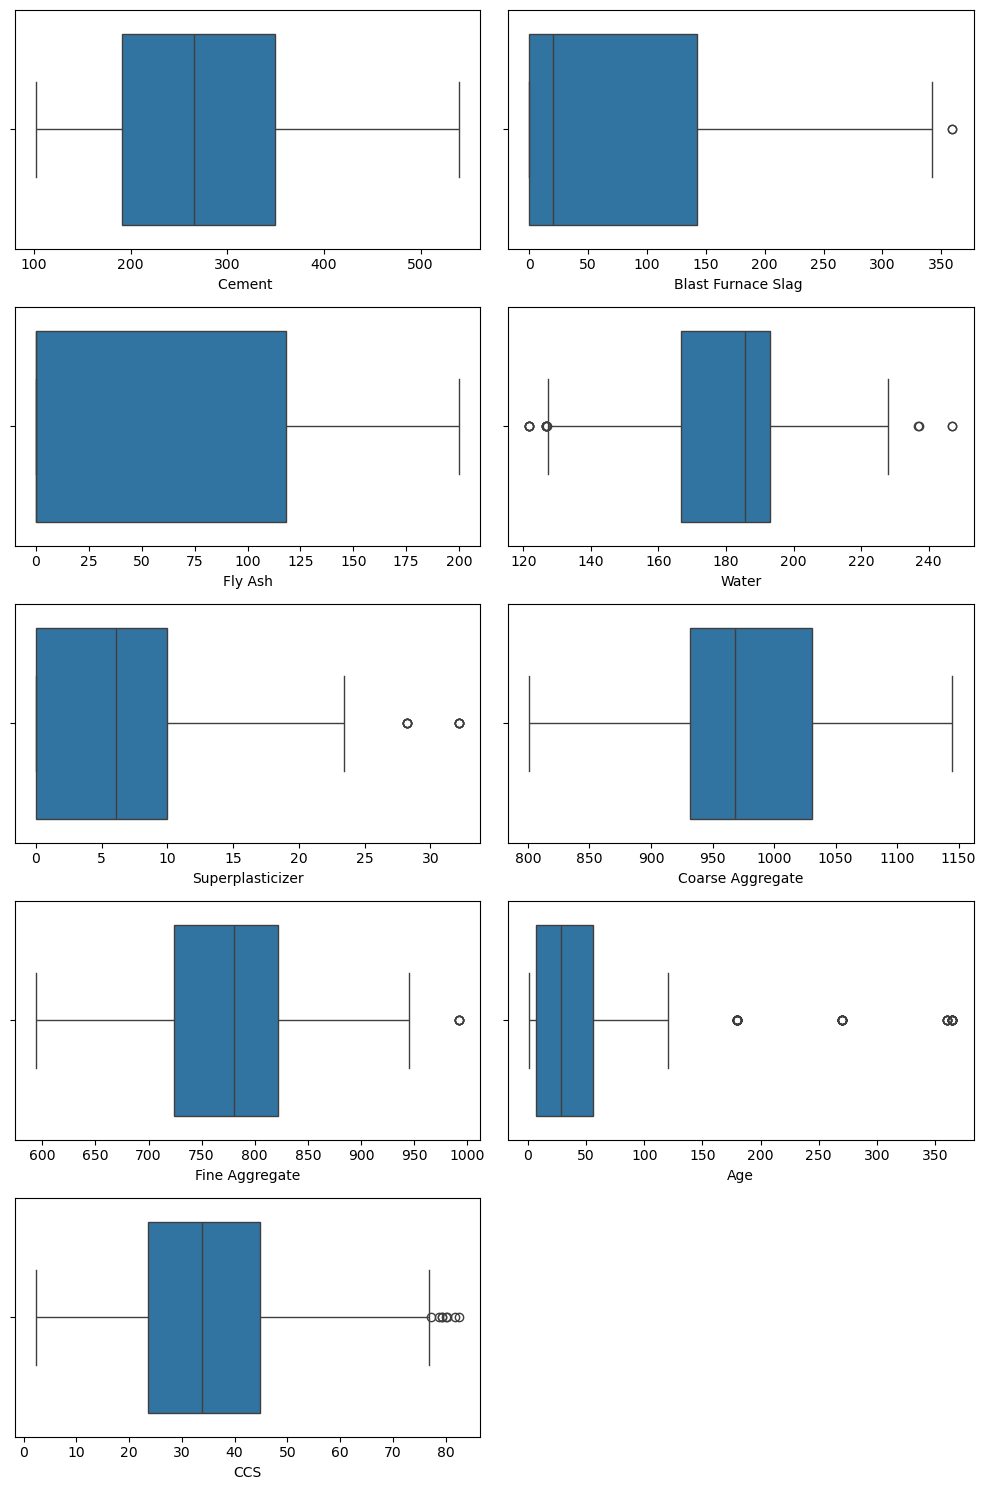

In [10]:
# Outliers

t = 1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t = t+1
plt.tight_layout()
plt.show()

In [11]:
## Capping the outliers (IQR method)

for i in data.columns:
    q3,q1 = np.percentile(data[i], [75,25])
    iqr = q3-q1
    ul, ll = q3+1.5*iqr, q1-1.5*iqr
    data[i] = data[i].apply(lambda x : ll if x<ll else ul if x>ul else x)

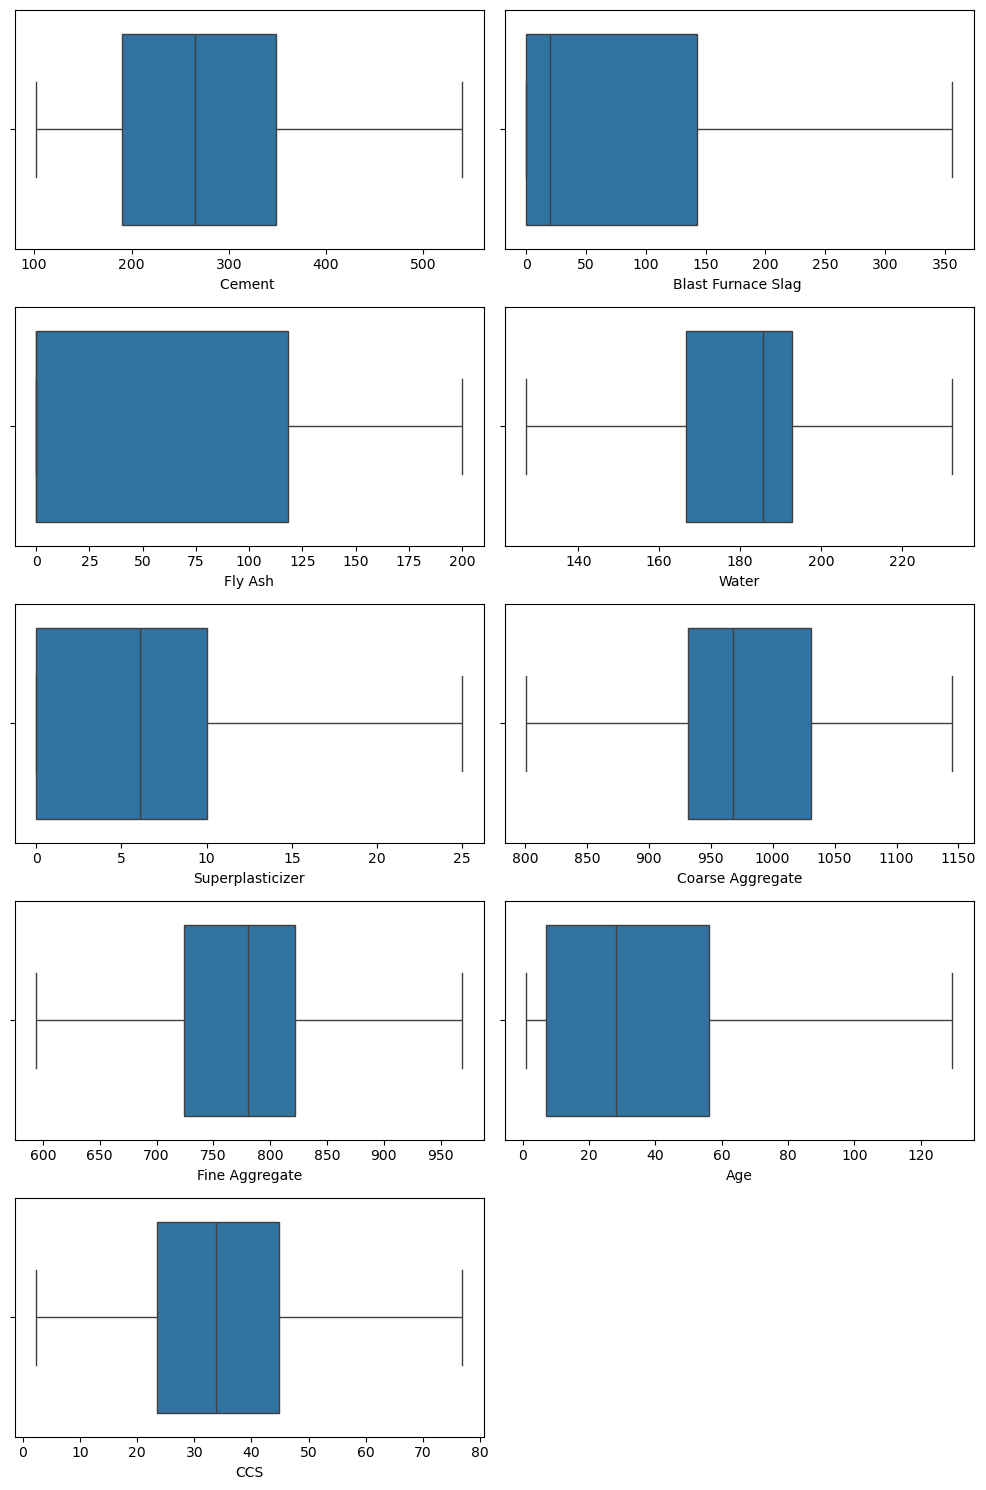

In [12]:
t = 1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t = t+1
plt.tight_layout()
plt.show()

## Linear Regression Analysis

In [13]:
# Split x and y

x = data.drop(columns='CCS')
y = data['CCS']

## Assumption 1 : Target variable must be numeric

## Assumption 2 : There should be no multicolinearity

In [14]:
# VIF

vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
    
vif_data = pd.DataFrame({'VIF':vif}, index=x.columns)
vif_data.sort_values(by='VIF', ascending = False)

,VIF
Coarse Aggregate,85.016957
Water,82.028328
Fine Aggregate,72.308018
Cement,15.213900
Superplasticizer,5.513072
Fly Ash,4.325332
Blast Furnace Slag,3.307520
Age,2.250063


In [15]:
sma.OLS(y, sma.add_constant(x)).fit().rsquared

0.7216237573284897

In [16]:
# Checking R2 with deleting columns one by one, if R2 is not making much difference means not decreasing much that means it 
# does not have significant relation so we can delete that column

sma.OLS(y, sma.add_constant(x.drop(columns='Coarse Aggregate'))).fit().rsquared

0.7214599162155249

In [17]:
sma.OLS(y, sma.add_constant(x.drop(columns='Water'))).fit().rsquared

0.7136615388147228

In [18]:
sma.OLS(y, sma.add_constant(x.drop(columns='Fine Aggregate'))).fit().rsquared

0.7214092505866176

In [19]:
sma.OLS(y, sma.add_constant(x.drop(columns='Cement '))).fit().rsquared

0.6540971411824044

In [20]:
# VIF

x.drop(columns=['Coarse Aggregate'], inplace = True)
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
    
vif_data = pd.DataFrame({'VIF':vif}, index=x.columns)
vif_data.sort_values(by='VIF', ascending = False)

,VIF
Water,72.333537
Fine Aggregate,47.949524
Cement,14.267535
Superplasticizer,5.464804
Fly Ash,4.159872
Blast Furnace Slag,3.278204
Age,2.248795


In [21]:
# Along with deleting the coarse aggregate column we are checking VIF again and we see that VIF decreases further

In [22]:
# VIF

x.drop(columns=['Fine Aggregate'], inplace = True)
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
    
vif_data = pd.DataFrame({'VIF':vif}, index=x.columns)
vif_data.sort_values(by='VIF', ascending = False)

,VIF
Water,21.626638
Cement,13.954376
Fly Ash,4.068454
Superplasticizer,3.918141
Blast Furnace Slag,2.991824
Age,2.234706


In [23]:
# Then we deleted fine aggregate column and we are checking for VIF which has decreased further and we are checking r2 again
# with this vif values 

In [24]:
sma.OLS(y, sma.add_constant(x.drop(columns='Water'))).fit().rsquared

0.6828068935632017

In [25]:
sma.OLS(y, sma.add_constant(x.drop(columns='Cement '))).fit().rsquared

0.4717210254877716

In [26]:
# and we find that if we delete water and cement column then r2 has decreased drastically which is not good for a model so we
# chose another method i.e., we make a new column and added water and cement columns and deleted original water and cement columns

In [27]:
x['Cement Water Ratio'] = x['Cement ']/x['Water']
x.drop(columns=['Cement ', 'Water'], inplace = True)

In [28]:
# then we checked for vif again and now we see vif has not decreased much
# and we calculated r2 which is again not decreased much so further we fitted the model

In [29]:
# VIF

vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
    
vif_data = pd.DataFrame({'VIF':vif}, index=x.columns)
vif_data.sort_values(by='VIF', ascending = False)

,VIF
Superplasticizer,3.478069
Cement Water Ratio,3.260167
Fly Ash,2.115637
Age,1.970481
Blast Furnace Slag,1.484503


In [30]:
sma.OLS(y, sma.add_constant(x)).fit().rsquared

0.7117175527539445

### Fit a model

In [31]:
model = sma.OLS(y, sma.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCS   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     493.3
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          7.66e-267
Time:                        11:16:59   Log-Likelihood:                -3600.7
No. Observations:                1005   AIC:                             7213.
Df Residuals:                     999   BIC:                             7243.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -14.4833    

## Assumption 3 : Linear Relation

In [32]:
# Linear Rainbow Test

# Ho : variables are linear
# Ha : variables are not linear

from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)
if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

reject Ho


## Assumption 4 : Autocorrelation

In [33]:
# Durbin watson = 1.266
# Hence there is positive autocorrelation

## Assumption 5 : Homoscedasticity

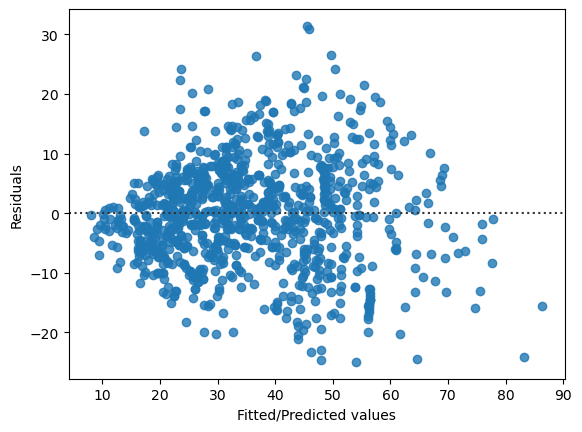

In [34]:
# Resid Plot

sns.residplot(x = model.fittedvalues, y = model.resid)
plt.xlabel('Fitted/Predicted values')
plt.ylabel('Residuals')
plt.show()

### Breusch Pagan Test

In [35]:
# Ho : variance is same
# Ha : variance is not same

p_value = sma.stats.diagnostic.het_breuschpagan(model.resid, exog_het = sma.add_constant(x).values)[1]
p_value

if p_value < 0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

reject Ho


## Assumption 6 : Residual are normal

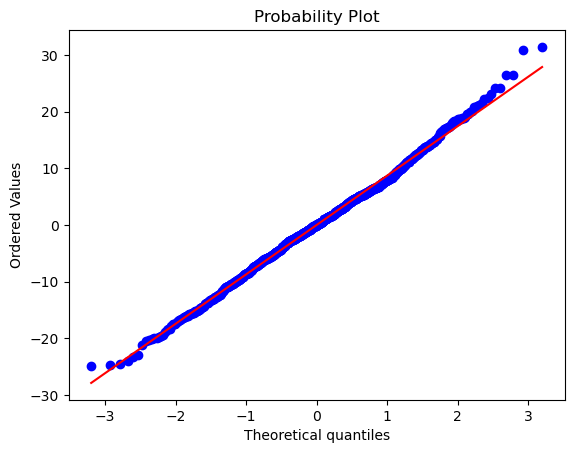

In [36]:
# QQ plot

stats.probplot(model.resid, plot=plt)
plt.show()

In [37]:
## Shapiro test

# Ho : data is normal
# Ha : data is not normal

p_value = stats.shapiro(model.resid)[1]
print(p_value)

if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

0.06153109669685364
fail to reject Ho


## Predictive Modelling

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import (mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score)
from sklearn.model_selection import train_test_split

## Train Test Split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=800, random_state=2)

In [40]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 5) (205, 5) (800,) (205,)


## Fit LR model

In [41]:
model_lr = LinearRegression()  # creating instance

In [42]:
model_lr.fit(x_train, y_train)   # fitting model in training datset
y_lr_train = model_lr.predict(x_train)
y_lr_test = model_lr.predict(x_test)

In [43]:
## Train Metrics

print('R2', r2_score(y_train, y_lr_train))
print('MSE', mean_squared_error(y_train, y_lr_train))
print('RMSE', mean_squared_error(y_train, y_lr_train)**0.5)
print('MAE', mean_absolute_error(y_train, y_lr_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_lr_train))

R2 0.7143103932676483
MSE 75.76260161073316
RMSE 8.704171506279799
MAE 6.809201716597718
MAPE 0.25434182808170447


In [44]:
## Test Metrics

print('R2', r2_score(y_test, y_lr_test))
print('MSE', mean_squared_error(y_test, y_lr_test))
print('RMSE', mean_squared_error(y_test, y_lr_test)**0.5)
print('MAE', mean_absolute_error(y_test, y_lr_test))
print('MAPE', mean_absolute_percentage_error(y_test, y_lr_test))

R2 0.6970935894657551
MSE 76.81189095069179
RMSE 8.764239325274715
MAE 6.82811080868435
MAPE 0.24600507146457556


In [45]:
model_lr.intercept_     # Bo

-15.111419169824352

In [46]:
pd.DataFrame({'Coef' : model_lr.coef_}, index=x.columns)      # B1

,Coef
Blast Furnace Slag,0.080493
Fly Ash,0.078325
Superplasticizer,0.201586
Age,0.239704
Cement Water Ratio,19.145826


## Regularization

## Ridge Regularization (L2 Penalty)

In [47]:
model_ridge = Ridge(alpha=0.1)  # alpha = 0.1 (less penalty)
model_ridge.fit(x_train, y_train)
y_ridge_train = model_ridge.predict(x_train)
y_ridge_test = model_ridge.predict(x_test)

In [48]:
# Train metrics

print('R2', r2_score(y_train, y_ridge_train))
print('MSE', mean_squared_error(y_train, y_ridge_train))
print('RMSE', mean_squared_error(y_train, y_ridge_train)**0.5)
print('MAE', mean_absolute_error(y_train, y_ridge_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_ridge_train))

R2 0.7143102782002051
MSE 75.76263212569994
RMSE 8.704173259172864
MAE 6.809272207884114
MAPE 0.25437499479448866


In [49]:
# Test metrics

print('R2', r2_score(y_test, y_ridge_test))
print('MSE', mean_squared_error(y_test, y_ridge_test))
print('RMSE', mean_squared_error(y_test, y_ridge_test)**0.5)
print('MAE', mean_absolute_error(y_test, y_ridge_test))
print('MAPE', mean_absolute_percentage_error(y_test, y_ridge_test))

R2 0.6971321879918011
MSE 76.80210302389199
RMSE 8.763680906097163
MAE 6.82765259139669
MAPE 0.24602853047220485


In [50]:
pd.DataFrame({'Coef_lr': model_lr.coef_, 'Coef_l2': model_ridge.coef_}, index = x.columns)

,Coef_lr,Coef_l2
Blast Furnace Slag,0.080493,0.080444
Fly Ash,0.078325,0.078234
Superplasticizer,0.201586,0.202439
Age,0.239704,0.239698
Cement Water Ratio,19.145826,19.133058


In [51]:
# Not much difference in both coeff as model is a generalized model

## LASSO Regularization (L1 Penalty)

In [52]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train, y_train)
y_lasso_train = model_lasso.predict(x_train)
y_lasso_test = model_lasso.predict(x_test)

In [53]:
# Train metrics

print('R2', r2_score(y_train, y_lasso_train))
print('MSE', mean_squared_error(y_train, y_lasso_train))
print('RMSE', mean_squared_error(y_train, y_lasso_train)**0.5)
print('MAE', mean_absolute_error(y_train, y_lasso_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_lasso_train))

R2 0.7141292518016429
MSE 75.81063888055589
RMSE 8.706930508540646
MAE 6.81747307833748
MAPE 0.2560019155282307


In [54]:
# Test metrics

print('R2', r2_score(y_test, y_lasso_test))
print('MSE', mean_squared_error(y_test, y_lasso_test))
print('RMSE', mean_squared_error(y_test, y_lasso_test)**0.5)
print('MAE', mean_absolute_error(y_test, y_lasso_test))
print('MAPE', mean_absolute_percentage_error(y_test, y_lasso_test))

R2 0.6984569119224616
MSE 76.46617566625633
RMSE 8.744494020025192
MAE 6.809401225009745
MAPE 0.24697762165608472


In [55]:
pd.DataFrame({'Coef_lr': model_lr.coef_, 'Coef_l2': model_ridge.coef_, 'Coef_l1' : model_lasso.coef_}, index = x.columns)

,Coef_lr,Coef_l2,Coef_l1
Blast Furnace Slag,0.080493,0.080444,0.078573
Fly Ash,0.078325,0.078234,0.074847
Superplasticizer,0.201586,0.202439,0.231686
Age,0.239704,0.239698,0.239333
Cement Water Ratio,19.145826,19.133058,18.641174


## Elastic Net Regression (L1 + L2)

In [56]:
model_en = ElasticNet(alpha=200, l1_ratio=0.2)
model_en.fit(x_train, y_train)
y_en_train = model_en.predict(x_train)
y_en_test = model_en.predict(x_test)

In [57]:
# Train metrics

print('R2', r2_score(y_train, y_en_train))
print('MSE', mean_squared_error(y_train, y_en_train))
print('RMSE', mean_squared_error(y_train, y_en_train)**0.5)
print('MAE', mean_absolute_error(y_train, y_en_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_en_train))

R2 0.22434900627054677
MSE 205.69644762033
RMSE 14.342121447691412
MAE 11.570321595768016
MAPE 0.510189299062992


In [58]:
# Test metrics

print('R2', r2_score(y_test, y_en_test))
print('MSE', mean_squared_error(y_test, y_en_test))
print('RMSE', mean_squared_error(y_test, y_en_test)**0.5)
print('MAE', mean_absolute_error(y_test, y_en_test))
print('MAPE', mean_absolute_percentage_error(y_test, y_en_test))

R2 0.23867069333201696
MSE 193.06010585317597
RMSE 13.894607078042041
MAE 10.93563798300138
MAPE 0.44859773893156796


In [59]:
pd.DataFrame({'Coef_lr': model_lr.coef_, 'Coef_l2': model_ridge.coef_, 'Coef_l1' : model_lasso.coef_, 
              'Coeff_en' : model_en.coef_}, index = x.columns)

,Coef_lr,Coef_l2,Coef_l1,Coeff_en
Blast Furnace Slag,0.080493,0.080444,0.078573,0.016107
Fly Ash,0.078325,0.078234,0.074847,0.000000
Superplasticizer,0.201586,0.202439,0.231686,0.000000
Age,0.239704,0.239698,0.239333,0.162752
Cement Water Ratio,19.145826,19.133058,18.641174,0.000000


## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid = {'alpha':[0.01, 0.05, 0.1, 0.5, 1]}
grid

{'alpha': [0.01, 0.05, 0.1, 0.5, 1]}

In [62]:
gscv = GridSearchCV(estimator=Ridge(), param_grid=grid, cv=5, scoring='r2', verbose=3)

In [63]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.706 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.727 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.678 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.710 total time=   0.0s
[CV 1/5] END ........................alpha=0.05;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.05;, score=0.706 total time=   0.0s
[CV 3/5] END ........................alpha=0.05;, score=0.727 total time=   0.0s
[CV 4/5] END ........................alpha=0.05;, score=0.678 total time=   0.0s
[CV 5/5] END ........................alpha=0.05;, score=0.710 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.724 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1]}, scoring='r2',
             verbose=3)

In [64]:
gscv.best_params_

{'alpha': 0.01}

In [65]:
gscv.best_score_

0.7089252575053908

In [66]:
gscv = GridSearchCV(estimator=Lasso(), param_grid=grid, cv=5, scoring='r2', verbose=3)

In [67]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.706 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.726 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.678 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.710 total time=   0.0s
[CV 1/5] END ........................alpha=0.05;, score=0.724 total time=   0.0s
[CV 2/5] END ........................alpha=0.05;, score=0.707 total time=   0.0s
[CV 3/5] END ........................alpha=0.05;, score=0.726 total time=   0.0s
[CV 4/5] END ........................alpha=0.05;, score=0.677 total time=   0.0s
[CV 5/5] END ........................alpha=0.05;, score=0.710 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.724 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;,

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1]}, scoring='r2',
             verbose=3)

In [68]:
gscv.best_params_

{'alpha': 0.01}

In [69]:
gscv.best_score_

0.7089214444069972

In [70]:
grid = {'alpha' :[0.01, 0.05, 0.1, 0.5, 1],
        'l1_ratio' : [0.05, 0.1, 0.15, 0.2]}

In [71]:
gscv = GridSearchCV(estimator=ElasticNet(), param_grid=grid, cv=5, scoring='r2', verbose=3)

In [72]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.724 total time=   0.0s
[CV 2/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.709 total time=   0.0s
[CV 3/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.723 total time=   0.0s
[CV 4/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.676 total time=   0.0s
[CV 5/5] END .........alpha=0.01, l1_ratio=0.05;, score=0.710 total time=   0.0s
[CV 1/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.724 total time=   0.0s
[CV 2/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.709 total time=   0.0s
[CV 3/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.723 total time=   0.0s
[CV 4/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.676 total time=   0.0s
[CV 5/5] END ..........alpha=0.01, l1_ratio=0.1;, score=0.710 total time=   0.0s
[CV 1/5] END .........alpha=0.01, l1_ratio=0.15;, score=0.724 total time=   0.0s
[CV 2/5] END .........alpha=0.01, l1_ratio=0.15

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1],
                         'l1_ratio': [0.05, 0.1, 0.15, 0.2]},
             scoring='r2', verbose=3)

In [73]:
gscv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.2}

In [74]:
gscv.best_score_

0.7084704400635264

## Gradient Descent

In [76]:
# Check scores from OLS model

print('OLS : Train Score:', model_lr.score(x_train, y_train))
print('OLS : Test Score:', model_lr.score(x_test, y_test))

OLS : Train Score: 0.7143103932676483
OLS : Test Score: 0.6970935894657551


In [78]:
pd.DataFrame({'Coef_OLS': model_lr.coef_}, index=x.columns)

,Coef_OLS
Blast Furnace Slag,0.080493
Fly Ash,0.078325
Superplasticizer,0.201586
Age,0.239704
Cement Water Ratio,19.145826


In [80]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [81]:
# Use the scaled data

sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [82]:
x_test_s  

array([[ 0.7720261 , -0.960937  , -1.19433411,  1.64707675, -0.09435479],
       [-0.29613449,  1.77501163,  0.01532469, -0.69729158, -0.70833446],
       [ 0.61027112,  1.12180843,  0.31633715, -0.26543426, -0.87609844],
       ...,
       [ 1.05278654, -0.960937  , -1.19433411, -0.26543426, -0.44119798],
       [-0.5971143 ,  0.28461098,  0.98192994, -0.91322024,  1.86796838],
       [ 1.20529838,  0.53687387,  0.5724782 , -0.26543426,  0.07841368]])

In [83]:
x_train_s

array([[-0.33760439,  1.70597584, -0.02674197, -0.96703269, -0.38765184],
       [-0.82708927, -0.84220766, -1.01155798, -0.28512335,  0.70701981],
       [-0.82708927,  1.86789118,  0.99595157, -0.28512335, -0.29368454],
       ...,
       [-0.69913457,  1.35088197, -0.7154245 , -0.8579272 , -0.92430657],
       [-0.82708927, -0.84220766, -1.01155798, -0.96703269, -0.37681285],
       [-0.82708927,  0.62887331, -0.22525471,  0.47861512, -0.60777185]])

In [84]:
sc.mean_  # mean for training data set

array([75.68063415, 60.94829268,  6.38803415, 36.60487805,  1.52058921])

In [85]:
sc.scale_

array([86.55065617, 63.42589843,  5.34861566, 32.41811411,  0.65980625])

In [86]:
x_train_s = pd.DataFrame(x_train_s, columns=x.columns)
x_test_s = pd.DataFrame(x_test_s, columns=x.columns)

In [87]:
x_test_s

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Cement Water Ratio
0,0.772026,-0.960937,-1.194334,1.647077,-0.094355
1,-0.296134,1.775012,0.015325,-0.697292,-0.708334
2,0.610271,1.121808,0.316337,-0.265434,-0.876098
3,0.610271,1.121808,0.316337,-0.697292,-0.876098
4,-0.874409,-0.960937,-1.194334,-0.697292,0.303457
...,...,...,...,...,...
200,0.893342,-0.960937,-1.194334,-0.265434,-1.499439
201,-0.874409,1.016173,0.258378,-1.036608,-0.522227
202,1.052787,-0.960937,-1.194334,-0.265434,-0.441198
203,-0.597114,0.284611,0.981930,-0.913220,1.867968


In [102]:
model_sgd = SGDRegressor(eta0=0.01, alpha=0.01)  # can put penalty also in this

In [103]:
model_sgd.fit(x_train_s, y_train)

SGDRegressor(alpha=0.01)

In [104]:
print('SGD : Train Score:', model_sgd.score(x_train_s, y_train))
print('SGD : Test Score:', model_sgd.score(x_test_s, y_test))

SGD : Train Score: 0.7139224987208759
SGD : Test Score: 0.7058579054091922


In [106]:
pd.DataFrame({'Coef_OLS': model_lr.coef_, 'Coef_SGD' : model_sgd.coef_}, index=x.columns)

,Coef_OLS,Coef_SGD
Blast Furnace Slag,0.080493,6.630331
Fly Ash,0.078325,4.563701
Superplasticizer,0.201586,1.455355
Age,0.239704,8.673926
Cement Water Ratio,19.145826,11.788474


In [ ]:
# The coeff has changed so much in SGD because we have scaled the data